In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

Imported the necessary libraries
-Pandas - Data Manipulation
-Numpy - Numerical computing
-Matplotlib and Seaborn - For visualizing the data

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Data loading by Pandas which is csv extension

In [3]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Display the bottommost values

In [4]:
df.shape

(891, 15)

Dimension of the dataset

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Column names of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.duplicated().sum() #repeated rows

107

In [9]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.drop(['pclass','embarked','alive','deck'], axis = 1, inplace=True)

In [11]:
df.shape

(891, 11)

In [12]:
df['age'].fillna(round(df['age'].mean()), inplace=True) # mean coz it is continuous vals

In [13]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True) # since multimode we use indexing to get 1st one
#there is lao unimode and bimode

In [14]:
df.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [15]:
def categorize(age):
    if age < 14:
        return 'Young'
    elif age < 21:
        return 'Adult'
    elif age < 35:
        return 'middle age'
    else:
        return 'senior'


In [16]:
df['Age_Group']= df['age'].apply(categorize)

In [17]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone,Age_Group
0,0,male,22.0,1,0,7.2500,Third,man,True,Southampton,False,middle age
1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False,senior
2,1,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True,middle age
3,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False,senior
4,0,male,35.0,0,0,8.0500,Third,man,True,Southampton,True,senior


In [18]:
df['alone'].replace({True:1,False:0}, inplace = True)

In [19]:
df['adult_male'].replace({True:1,False:0}, inplace = True)

In [20]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone,Age_Group
0,0,male,22.0,1,0,7.2500,Third,man,1,Southampton,0,middle age
1,1,female,38.0,1,0,71.2833,First,woman,0,Cherbourg,0,senior
2,1,female,26.0,0,0,7.9250,Third,woman,0,Southampton,1,middle age
3,1,female,35.0,1,0,53.1000,First,woman,0,Southampton,0,senior
4,0,male,35.0,0,0,8.0500,Third,man,1,Southampton,1,senior


In [21]:
df.describe().T # .T is transpose

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
age,891.0,29.758889,13.002570,0.42,22.0000,30.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
adult_male,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000
alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


In [22]:
df.describe(include = 'object')

,sex,who,embark_town,Age_Group
count,891,891,891,891
unique,2,3,3,4
top,male,man,Southampton,middle age
freq,577,537,646,476


In [23]:
num_col = df.select_dtypes(include = np.number).columns.tolist()
cat_col = df.select_dtypes(include=['object','category']).columns

print(num_col)
print(cat_col)

['survived', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']
Index(['sex', 'class', 'who', 'embark_town', 'Age_Group'], dtype='object')


survived


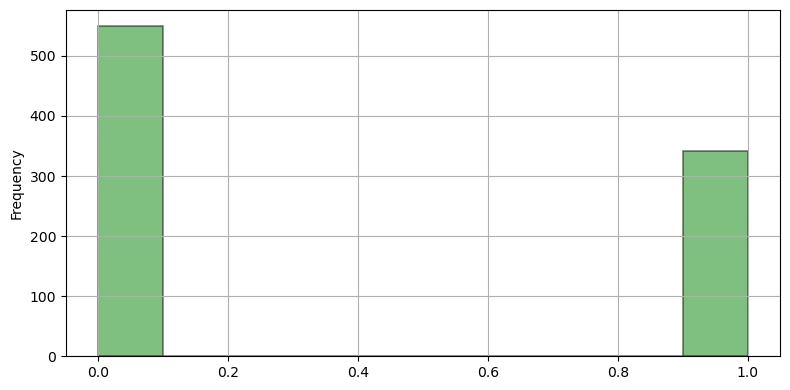

age


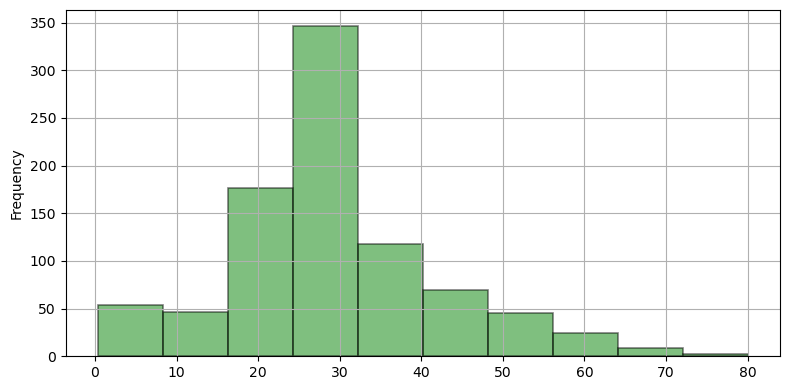

sibsp


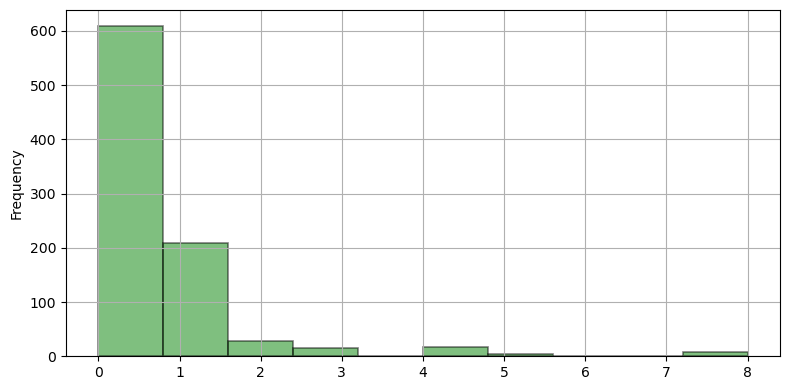

parch


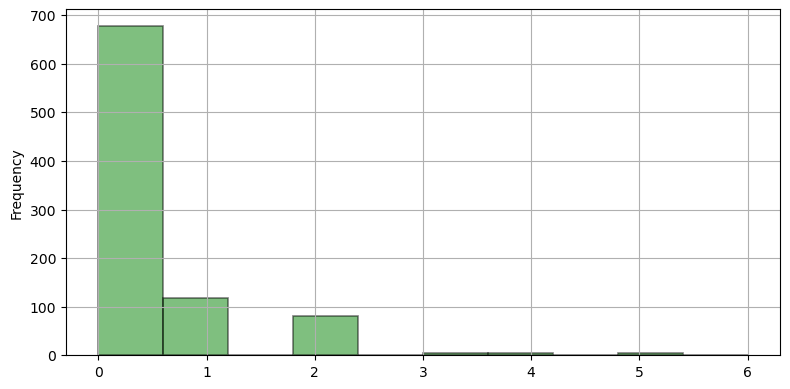

fare


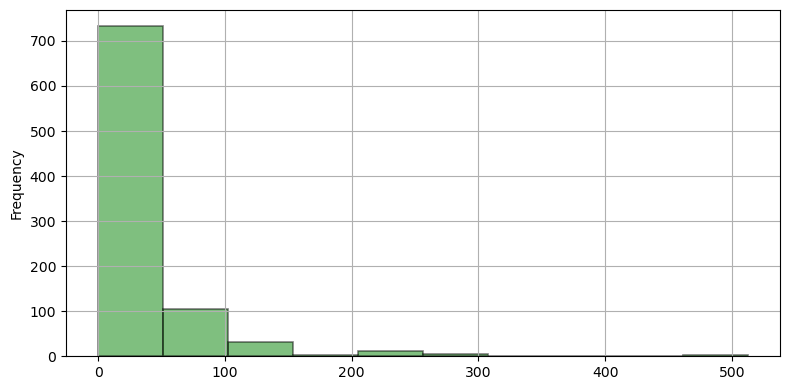

adult_male


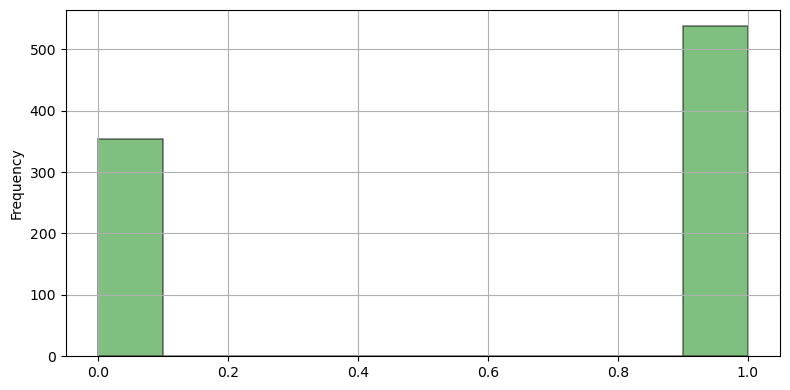

alone


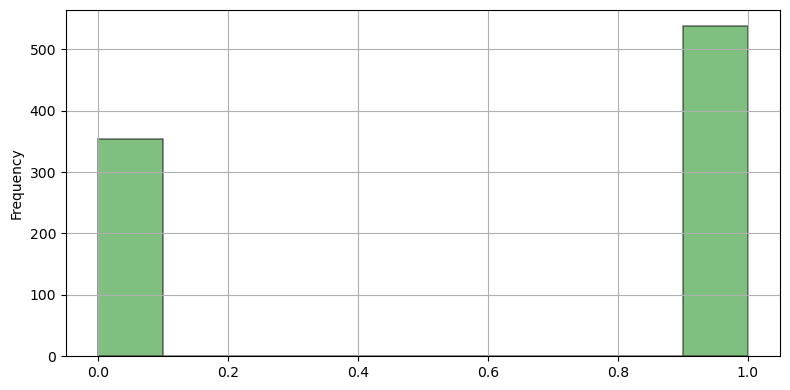

In [24]:
for col in num_col:
    print(col)

    plt.figure(figsize=(8,4))
    plt.subplot(1,1,1)
    df[col].hist(bins = 10, alpha = 0.5, edgecolor = 'black', lw = 1.2, color ='Green')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

sex


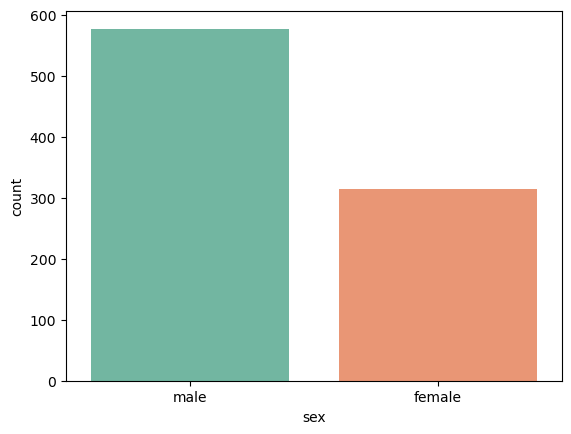

class


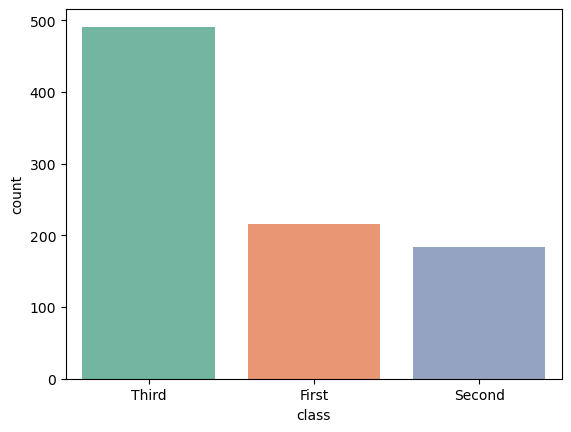

who


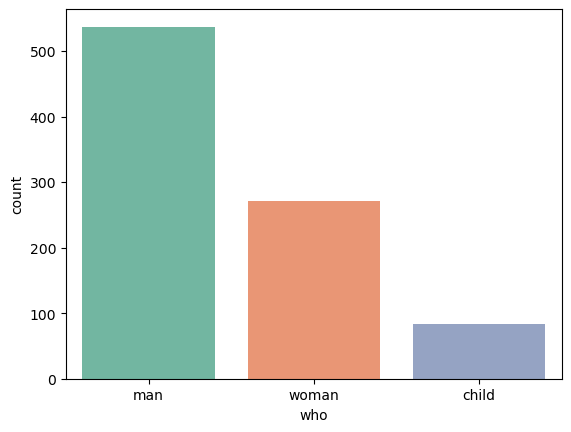

embark_town


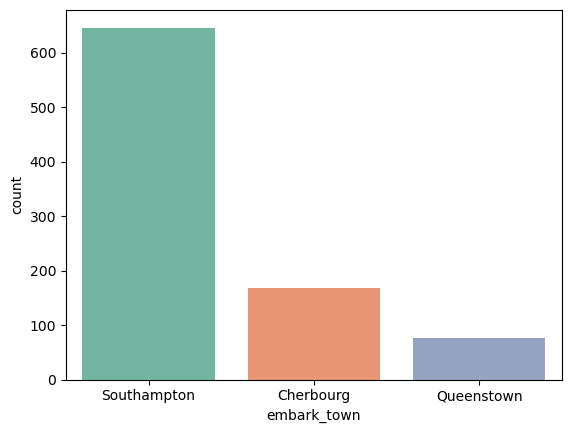

Age_Group


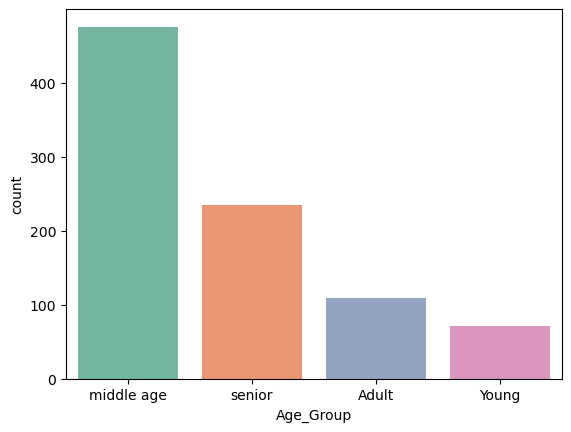

In [25]:
for col in cat_col:
    print(col)

    sns.countplot(x =col,data =df, order = df[col].value_counts().index, palette ='Set2')
    plt.ylabel('count')
    plt.show()

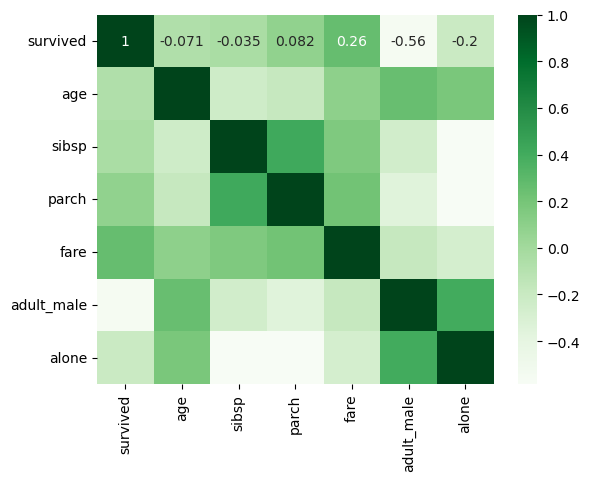

In [36]:
corr = df[num_col].corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)
plt.show()

In [27]:
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'embark_town', 'alone', 'Age_Group'],
      dtype='object')

In [28]:
df.groupby(['survived', 'sex']).agg({'survived':'count'})

survived
survived sex             
0        female        81
         male         468
1        female       233
         male         109

In [29]:
df.groupby(['survived', 'class']).agg({'survived':'count'})

survived
survived class           
0        First         80
         Second        97
         Third        372
1        First        136
         Second        87
         Third        119

In [30]:
df.groupby(['survived', 'embark_town']).agg({'survived':'count'})

survived
survived embark_town          
0        Cherbourg          75
         Queenstown         47
         Southampton       427
1        Cherbourg          93
         Queenstown         30
         Southampton       219

In [31]:
df.groupby(['survived', 'adult_male']).agg({'survived':'count'})

survived
survived adult_male          
0        0                100
         1                449
1        0                254
         1                 88

In [32]:
df.groupby(['survived', 'alone']).agg({'survived':'count'})

survived
survived alone          
0        0           175
         1           374
1        0           179
         1           163

In [33]:
df.groupby(['survived', 'Age_Group']).agg({'survived':'count'})

survived
survived Age_Group           
0        Adult             69
         Young             29
         middle age       310
         senior           141
1        Adult             40
         Young             42
         middle age       166
         senior            94